In [28]:
# Importarea bibliotecilor necesare
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Citește fișierul CSV
file_path = '/content/drive/MyDrive/Classroom/TIA/SET_DE_DATE_2/heart_disease.csv'
data = pd.read_csv(file_path)

# Verificarea valorilor lipsă
data = data.dropna()

# Separarea caracteristicilor (X) și țintei (y)
X = data.drop(columns=data.columns[-1])  # Toate coloanele, mai puțin ultima, ca caracteristici
y = data[data.columns[-1]]  # Ultima coloană ca variabilă țintă

# Codificarea variabilelor categorice
le = LabelEncoder()
X = X.apply(lambda col: le.fit_transform(col) if col.dtypes == 'object' else col)
if y.dtype == 'object':
    y = le.fit_transform(y)

# Împărțirea datelor în antrenare (60%), validare (20%), testare (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Funcția pentru afișarea matricii de confuzie și a indicatorilor
def plot_confusion_matrix_with_metrics(y_true, y_pred, set_name, algorithm_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calcularea indicatorilor
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Matricea de confuzie în format tabelar
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {algorithm_name} ({set_name} Set)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Afișarea matricii de confuzie în format textual
    print(f"Confusion Matrix for {algorithm_name} ({set_name} Set):")
    print(f"[[ True Positive: {tp}    False Positive: {fp}  ]")
    print(f" [ False Negative: {fn}    True Negative: {tn}  ]]\n")

    # Afișarea indicatorilor de performanță
    print(f"Performance Metrics for {algorithm_name} ({set_name} Set):")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1-Score: {f1:.2f}\n")



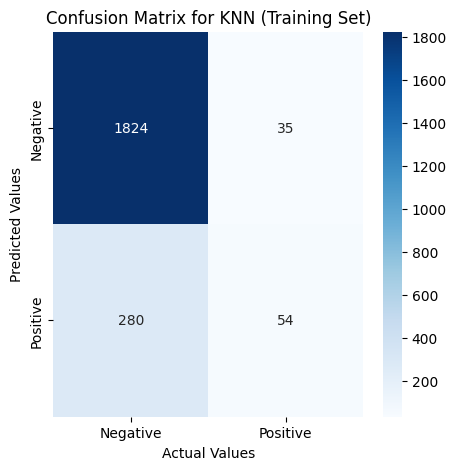

Confusion Matrix for KNN (Training Set):
[[ True Positive: 54    False Positive: 35  ]
 [ False Negative: 280    True Negative: 1824  ]]

Performance Metrics for KNN (Training Set):
Accuracy: 0.86
Precision: 0.61
Recall: 0.16
Specificity: 0.98
F1-Score: 0.26



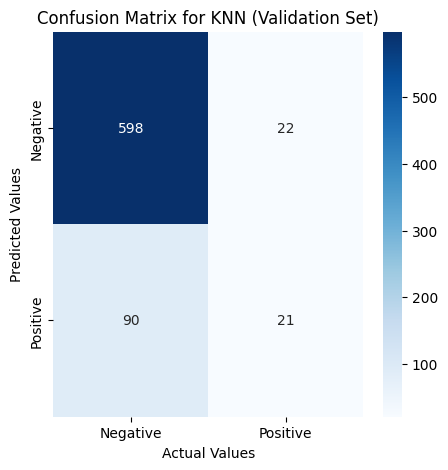

Confusion Matrix for KNN (Validation Set):
[[ True Positive: 21    False Positive: 22  ]
 [ False Negative: 90    True Negative: 598  ]]

Performance Metrics for KNN (Validation Set):
Accuracy: 0.85
Precision: 0.49
Recall: 0.19
Specificity: 0.96
F1-Score: 0.27



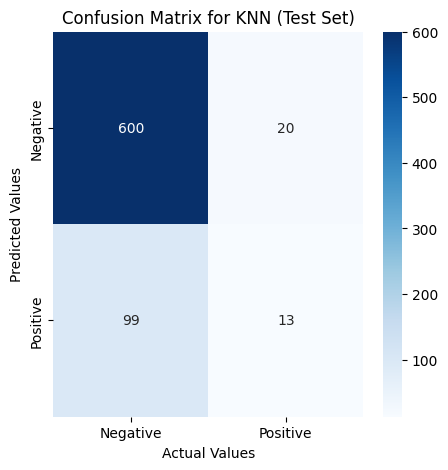

Confusion Matrix for KNN (Test Set):
[[ True Positive: 13    False Positive: 20  ]
 [ False Negative: 99    True Negative: 600  ]]

Performance Metrics for KNN (Test Set):
Accuracy: 0.84
Precision: 0.39
Recall: 0.12
Specificity: 0.97
F1-Score: 0.18



In [29]:

# -------------------------------
# KNN
# -------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicții KNN
y_train_pred_knn = knn.predict(X_train)
y_val_pred_knn = knn.predict(X_val)
y_test_pred_knn = knn.predict(X_test)

# Afișare rezultate KNN
plot_confusion_matrix_with_metrics(y_train, y_train_pred_knn, "Training", "KNN")
plot_confusion_matrix_with_metrics(y_val, y_val_pred_knn, "Validation", "KNN")
plot_confusion_matrix_with_metrics(y_test, y_test_pred_knn, "Test", "KNN")

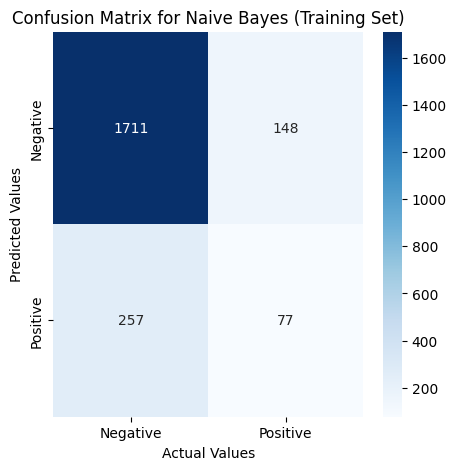

Confusion Matrix for Naive Bayes (Training Set):
[[ True Positive: 77    False Positive: 148  ]
 [ False Negative: 257    True Negative: 1711  ]]

Performance Metrics for Naive Bayes (Training Set):
Accuracy: 0.82
Precision: 0.34
Recall: 0.23
Specificity: 0.92
F1-Score: 0.28



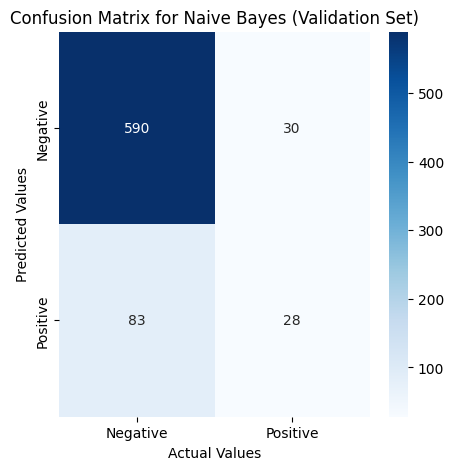

Confusion Matrix for Naive Bayes (Validation Set):
[[ True Positive: 28    False Positive: 30  ]
 [ False Negative: 83    True Negative: 590  ]]

Performance Metrics for Naive Bayes (Validation Set):
Accuracy: 0.85
Precision: 0.48
Recall: 0.25
Specificity: 0.95
F1-Score: 0.33



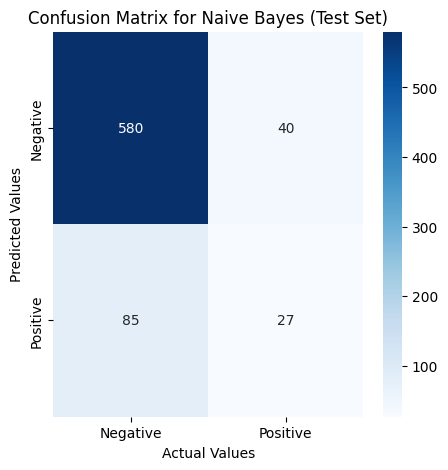

Confusion Matrix for Naive Bayes (Test Set):
[[ True Positive: 27    False Positive: 40  ]
 [ False Negative: 85    True Negative: 580  ]]

Performance Metrics for Naive Bayes (Test Set):
Accuracy: 0.83
Precision: 0.40
Recall: 0.24
Specificity: 0.94
F1-Score: 0.30



In [30]:

# -------------------------------
# Naive Bayes
# -------------------------------
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicții Naive Bayes
y_train_pred_nb = nb.predict(X_train)
y_val_pred_nb = nb.predict(X_val)
y_test_pred_nb = nb.predict(X_test)

# Afișare rezultate Naive Bayes
plot_confusion_matrix_with_metrics(y_train, y_train_pred_nb, "Training", "Naive Bayes")
plot_confusion_matrix_with_metrics(y_val, y_val_pred_nb, "Validation", "Naive Bayes")
plot_confusion_matrix_with_metrics(y_test, y_test_pred_nb, "Test", "Naive Bayes")
